<a href="https://colab.research.google.com/github/KOCORA/-/blob/master/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.81661707, 0.57443248, 0.6292889 ],
       [0.34888247, 0.54420044, 0.85112405],
       [0.3002703 , 0.1017502 , 0.40830935],
       [0.16386611, 0.07141678, 0.7297935 ],
       [0.1829324 , 0.37879362, 0.93428766]])

In [ ]:
# размеры массива
a.shape

(5, 3)

In [ ]:
# сложение
a + 5

array([[5.81661707, 5.57443248, 5.6292889 ],
       [5.34888247, 5.54420044, 5.85112405],
       [5.3002703 , 5.1017502 , 5.40830935],
       [5.16386611, 5.07141678, 5.7297935 ],
       [5.1829324 , 5.37879362, 5.93428766]])

In [ ]:
# матричное умножение
a @ a.T

array([[1.39284063, 1.1331127 , 0.56059901, 0.63409093, 0.95491393],
       [1.1331127 , 1.14228524, 0.50765346, 0.71717986, 1.06515626],
       [0.56059901, 0.50765346, 0.26723188, 0.35445231, 0.47494988],
       [0.63409093, 0.71717986, 0.35445231, 0.56455101, 0.7388657 ],
       [0.95491393, 1.06515626, 0.47494988, 0.7388657 , 1.0498423 ]])

In [ ]:
# среднее по колонкам
a.mean(axis=-1)

array([0.67344615, 0.58140232, 0.27010995, 0.32169213, 0.49867122])

In [ ]:
# решейп
a.reshape(3, 5).shape

(3, 5)

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE
(np.arange(1, 10000) ** 2).sum()

333283335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [ ]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.5265, 0.5303, 0.9876],
        [0.8013, 0.4953, 0.5296],
        [0.8938, 0.8264, 0.9589],
        [0.6393, 0.3921, 0.8295],
        [0.7200, 0.4850, 0.7463]])

In [ ]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [ ]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [ ]:
# сложение
x + 5

tensor([[5.5265, 5.5303, 5.9876],
        [5.8013, 5.4953, 5.5296],
        [5.8938, 5.8264, 5.9589],
        [5.6393, 5.3921, 5.8295],
        [5.7200, 5.4850, 5.7463]])

In [ ]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.5337, 1.2076, 1.8558, 1.3637, 1.3733],
        [1.2076, 1.1679, 1.6333, 1.1458, 1.2124],
        [1.8558, 1.6333, 2.4013, 1.6908, 1.7599],
        [1.3637, 1.1458, 1.6908, 1.2505, 1.2695],
        [1.3733, 1.2124, 1.7599, 1.2695, 1.3105]])

In [ ]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.5337, 1.2076, 1.8558, 1.3637, 1.3733],
        [1.2076, 1.1679, 1.6333, 1.1458, 1.2124],
        [1.8558, 1.6333, 2.4013, 1.6908, 1.7599],
        [1.3637, 1.1458, 1.6908, 1.2505, 1.2695],
        [1.3733, 1.2124, 1.7599, 1.2695, 1.3105]])

In [ ]:
# поэлементное умножение
x * x

tensor([[0.2772, 0.2812, 0.9753],
        [0.6421, 0.2453, 0.2805],
        [0.7988, 0.6829, 0.9195],
        [0.4087, 0.1538, 0.6880],
        [0.5183, 0.2353, 0.5569]])

In [ ]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.6815, 0.6087, 0.8930, 0.6203, 0.6504])

In [ ]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE

(torch.arange(1, 10001) **2).sum()

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [ ]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22],
        [2.1715e-18, 1.7187e-04, 4.2726e-05],
        [6.7061e+22, 6.5548e-10, 1.9990e+20]])

In [ ]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.2333, 0.3601, 0.2053],
        [0.6650, 0.6134, 0.0996],
        [0.1686, 0.6412, 0.5894],
        [0.2742, 0.6783, 0.4069],
        [0.8815, 0.8694, 0.3076]])

In [ ]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [ ]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.8006, -0.3471,  0.8917],
        [ 0.5477, -0.1780,  0.2380],
        [ 1.2210, -0.0360,  0.2307],
        [ 0.1117,  0.0488,  0.7672],
        [-0.5594, -0.9847, -0.0719]])

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [ ]:
x

tensor([[0.8814, 0.2661, 0.4957],
        [0.7987, 0.2086, 0.4364],
        [0.0568, 0.2108, 0.5626],
        [0.6153, 0.4772, 0.6645],
        [0.4684, 0.0118, 0.4191]])

In [ ]:
y

tensor([[0.8560, 0.1632, 0.6538],
        [0.7376, 0.0232, 0.8061],
        [0.1220, 0.0173, 0.1357],
        [0.4067, 0.3269, 0.7830],
        [0.9709, 0.1715, 0.1140]])

In [ ]:
# сложение
x + y

tensor([[1.7374, 0.4294, 1.1495],
        [1.5363, 0.2317, 1.2424],
        [0.1787, 0.2281, 0.6983],
        [1.0220, 0.8041, 1.4475],
        [1.4392, 0.1833, 0.5332]])

In [ ]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.7374, 0.4294, 1.1495],
        [1.5363, 0.2317, 1.2424],
        [0.1787, 0.2281, 0.6983],
        [1.0220, 0.8041, 1.4475],
        [1.4392, 0.1833, 0.5332]])

In [ ]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.7374, 0.4294, 1.1495],
        [1.5363, 0.2317, 1.2424],
        [0.1787, 0.2281, 0.6983],
        [1.0220, 0.8041, 1.4475],
        [1.4392, 0.1833, 0.5332]])

In [ ]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [ ]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [ ]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [ ]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [ ]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [ ]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

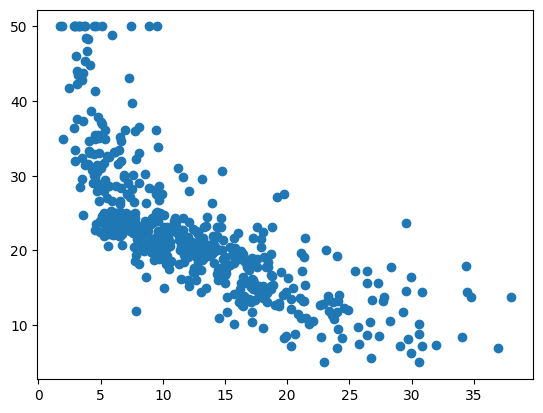

In [ ]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

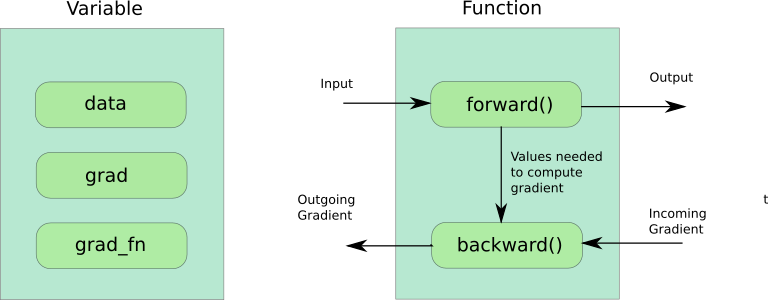

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [ ]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [ ]:
y_pred

tensor([0.6121, 0.7010, 0.5917, 0.5684, 0.6195, 0.6170, 0.7714, 0.9151, 1.1456,
        0.8712, 0.9429, 0.7893, 0.8415, 0.6822, 0.7250, 0.6867, 0.6463, 0.8193,
        0.7555, 0.7468, 0.9551, 0.8013, 0.9059, 0.9307, 0.8541, 0.8586, 0.8223,
        0.8751, 0.7793, 0.7618, 0.9889, 0.7844, 1.0981, 0.8980, 0.9405, 0.7126,
        0.7496, 0.6931, 0.7222, 0.5979, 0.5479, 0.6091, 0.6298, 0.6647, 0.7098,
        0.7239, 0.8082, 0.9076, 1.1644, 0.8520, 0.7932, 0.7072, 0.6185, 0.6858,
        0.8221, 0.6084, 0.6290, 0.5900, 0.6523, 0.7027, 0.7868, 0.8144, 0.6495,
        0.7087, 0.6777, 0.6054, 0.7245, 0.6788, 0.7855, 0.6935, 0.6493, 0.7168,
        0.6236, 0.6668, 0.6506, 0.6967, 0.7615, 0.7252, 0.7694, 0.7002, 0.6187,
        0.6600, 0.6493, 0.6662, 0.7113, 0.6452, 0.7806, 0.6860, 0.6232, 0.6275,
        0.6940, 0.6809, 0.6801, 0.6384, 0.7320, 0.6478, 0.7481, 0.5956, 0.5819,
        0.6379, 0.7070, 0.6696, 0.7329, 0.7930, 0.7692, 0.8578, 0.9046, 0.8069,
        0.7680, 0.8381, 0.7836, 0.7228, 

In [ ]:
w.grad, b.grad

(tensor([-11.8961]), tensor([-43.5133]))

In [ ]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.8961])
dL/db = tensor([-43.5133])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data, w.grad

(tensor([0.8120]), tensor([-11.8961]))

In [ ]:
w

tensor([0.8120], requires_grad=True)

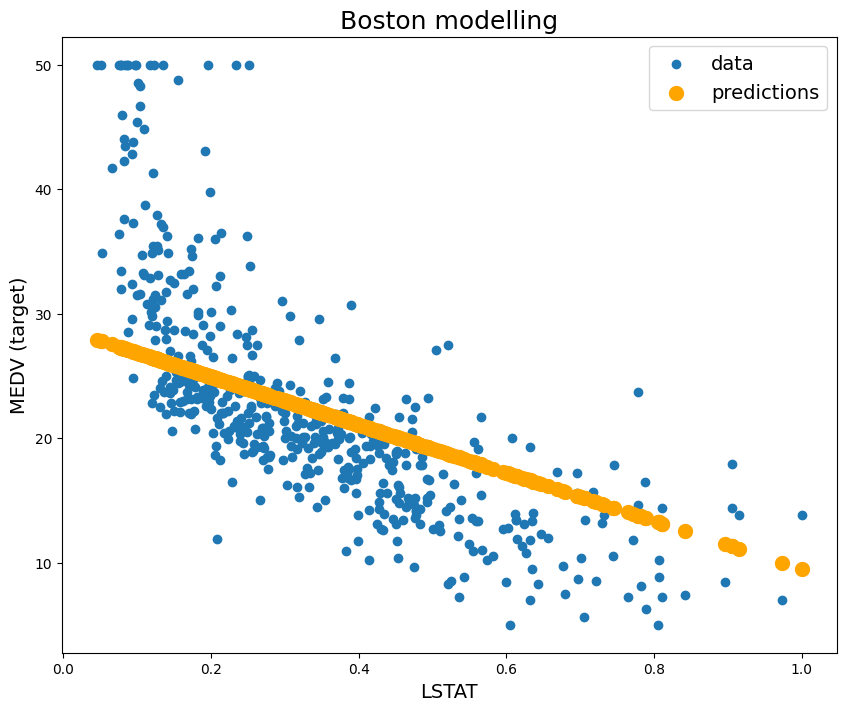

loss =  48.4555


In [ ]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset[2:5]

{'sample': tensor([[0.7484, 0.4157, 0.5330, 0.4414, 0.0454],
         [0.4006, 0.3775, 0.9923, 0.1752, 0.5674],
         [0.9147, 0.3779, 0.1431, 0.6776, 0.9102]]),
 'target': array([0.182859  , 0.61298108, 0.74363651])}

In [ ]:
our_dataset.__getitem__(1)

{'sample': tensor([0.0138, 0.2633, 0.0904, 0.1472, 0.7664]),
 'target': 0.29326667051662225}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [ ]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.5600, 0.7337, 0.5409, 0.1534, 0.6108],
        [0.0138, 0.2633, 0.0904, 0.1472, 0.7664],
        [0.7484, 0.4157, 0.5330, 0.4414, 0.0454],
        [0.4006, 0.3775, 0.9923, 0.1752, 0.5674]])
Target:
tensor([0.6627, 0.2933, 0.1829, 0.6130], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [ ]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [ ]:
y_pred = model(batch["sample"])  # получили предсказания модели

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [ ]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100%|██████████| 9912422/9912422 [00:00<00:00, 167324191.84it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38237277.09it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37489179.66it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5370884.91it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



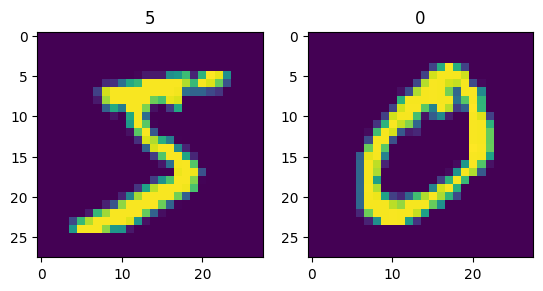

In [ ]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [ ]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 0.0241,  0.0166, -0.0012,  ...,  0.0037,  0.0039,  0.0166],
          [-0.0307, -0.0068,  0.0035,  ...,  0.0033, -0.0247,  0.0153],
          [ 0.0173, -0.0309,  0.0140,  ...,  0.0101,  0.0008, -0.0107],
          ...,
          [ 0.0135,  0.0230, -0.0095,  ...,  0.0231,  0.0205, -0.0097],
          [-0.0316,  0.0106, -0.0210,  ..., -0.0169, -0.0027,  0.0308],
          [-0.0330, -0.0166, -0.0079,  ..., -0.0148, -0.0324, -0.0154]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-1.9803e-02,  2.6645e-02, -1.8538e-02,  2.6060e-02,  3.0813e-02,
           2.4267e-02, -1.6752e-02, -3.3907e-02,  2.4131e-02, -2.9596e-02,
           1.2044e-02, -1.6762e-02, -2.6484e-02, -8.3111e-03,  2.0350e-03,
           2.5648e-02, -1.7486e-02,  3.0614e-02,  6.4774e-03,  1.3594e-02,
           3.0630e-02, -3.0218e-02,  3.2258e-03, -2.2587e-03, -2.7785e-02,
           1.2154e-02,  1.0675e-02, -3.7096e-03, -2.4286e-02,  1.1541e-0

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [ ]:
!pip install wandb --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import wandb

In [ ]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login
#wandb.login()

wandb: Currently logged in as: kocorab7 (kocora). Use `wandb login --relogin` to force relogin


In [ ]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Currently logged in as: kocorab7 (kocora). Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [ ]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.6872, 0.1032],
        [0.7624, 0.4065]], device='cuda:0')

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [ ]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11980300396680832, accuracy: 0.9599


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09545932710170746, accuracy: 0.9711


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07764595001935959, accuracy: 0.9766


### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)